# 1. Imports 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# constants
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines.csv')

# 2. Data

In [4]:
from sklearn.model_selection import train_test_split

target = ['temperature','g','v']

x = O_df.drop(target,axis = 1)
y = O_df[target]

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.5, test_size=0.1, random_state=42)

# 3. Base Classificator

# 4. SVM

In [ ]:
#from sklearn.svm import LinearSVR
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#
#pca = PCA(20)
#pca.fit(x)
#
#scaler = StandardScaler()
##scaler = scaler.fit(y)
#
#decompXTrain = pca.transform(x_train)
#decompXVal = pca.transform(x_val)
#scaledYTrain = y_train/y.max()
#scaledYVal = y_val/y.max()
#
#clf = LinearSVR()
#
#g_clf = clf.fit(decompXTrain,scaledYTrain)
#
#from sklearn.metrics import confusion_matrix
#
#predictions = g_clf.predict(decompXVal)
#cm = confusion_matrix(scaledYVal, predictions)
#sns.heatmap(cm, annot=True)

c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: continuous is not supported

# 5. Decision Tree

# 6. Neural Network Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = O_df.drop(target,axis = 1)

yScaler = StandardScaler()
yScaler = yScaler.fit(y)

x_train, x_val, y_train, y_val = train_test_split(x, yScaler.fit_transform(y), train_size=0.5, test_size=0.1, random_state=42)

# 7. NN Training

In [6]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

#input_shape = (4, 10, 128) = (batch_size, steps, vectorLength) = (batchsize, rotaciones, frecuencias)

normalize = layers.Normalization()

normalize.adapt(x_train)

input_shape = (x_train.shape[1],1)

simple_model = tf.keras.Sequential([
  keras.Input(shape=(input_shape)),
  normalize,
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.MaxPooling1D(pool_size=3, padding='same'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling1D(),
])

In [7]:
simple_model = tf.keras.Model(inputs=simple_model.input, outputs=simple_model.output) 
simple_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 702, 1)]          0         
                                                                 
 normalization (Normalizatio  (None, 702, 702)         1405      
 n)                                                              
                                                                 
 conv1d (Conv1D)             (None, 702, 32)           67424     
                                                                 
 conv1d_1 (Conv1D)           (None, 702, 32)           3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 702, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 234, 32)          0         
 )                                                           

In [11]:

hidden = layers.Dense(128, activation='relu')(simple_model.output)
output = layers.Dense(3, activation='linear',name='t_out')(hidden)

# la linea de abajo es la que ensambla
complete_model = tf.keras.Model(inputs=simple_model.input, outputs=output)  
complete_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 702, 1)]          0         
                                                                 
 normalization (Normalizatio  (None, 702, 702)         1405      
 n)                                                              
                                                                 
 conv1d (Conv1D)             (None, 702, 32)           67424     
                                                                 
 conv1d_1 (Conv1D)           (None, 702, 32)           3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 702, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 234, 32)          0         
 )                                                         

                                                                 
 conv1d_5 (Conv1D)           (None, 234, 64)           8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 117, 64)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 117, 128)          16512     
                                                                 
 conv1d_7 (Conv1D)           (None, 117, 128)          32896     
                                                                 
 conv1d_8 (Conv1D)           (None, 117, 128)          32896     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 59, 128)          0         
 1D)                                                             
                                                                 
 global_av

In [15]:
complete_model.compile(loss = ['MAE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MSE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = complete_model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=10)

Epoch 1/10
162/162 [==============================] - 5s 27ms/step - loss: 1.3349 - MSE: 65.6293 - val_loss: 0.3137 - val_MSE: 0.1800
Epoch 2/10
162/162 [==============================] - 4s 26ms/step - loss: 0.2145 - MSE: 0.0845 - val_loss: 0.1669 - val_MSE: 0.0469
Epoch 3/10
162/162 [==============================] - 4s 26ms/step - loss: 0.1593 - MSE: 0.0486 - val_loss: 0.1263 - val_MSE: 0.0311
Epoch 4/10
162/162 [==============================] - 4s 26ms/step - loss: 0.1209 - MSE: 0.0282 - val_loss: 0.1105 - val_MSE: 0.0217
Epoch 5/10
162/162 [==============================] - 4s 26ms/step - loss: 0.1138 - MSE: 0.0245 - val_loss: 0.1548 - val_MSE: 0.0352
Epoch 6/10
162/162 [==============================] - 4s 26ms/step - loss: 0.1195 - MSE: 0.0263 - val_loss: 0.1692 - val_MSE: 0.0507
Epoch 7/10
162/162 [==============================] - 4s 26ms/step - loss: 0.1141 - MSE: 0.0244 - val_loss: 0.1145 - val_MSE: 0.0213
Epoch 8/10
162/162 [==============================] - 4s 26ms/step -

In [14]:
from sklearn.metrics import confusion_matrix

predictions = complete_model.predict(x_val)
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True)

33/33 [==============================] - 1s 19ms/step


ValueError: continuous-multioutput is not supported

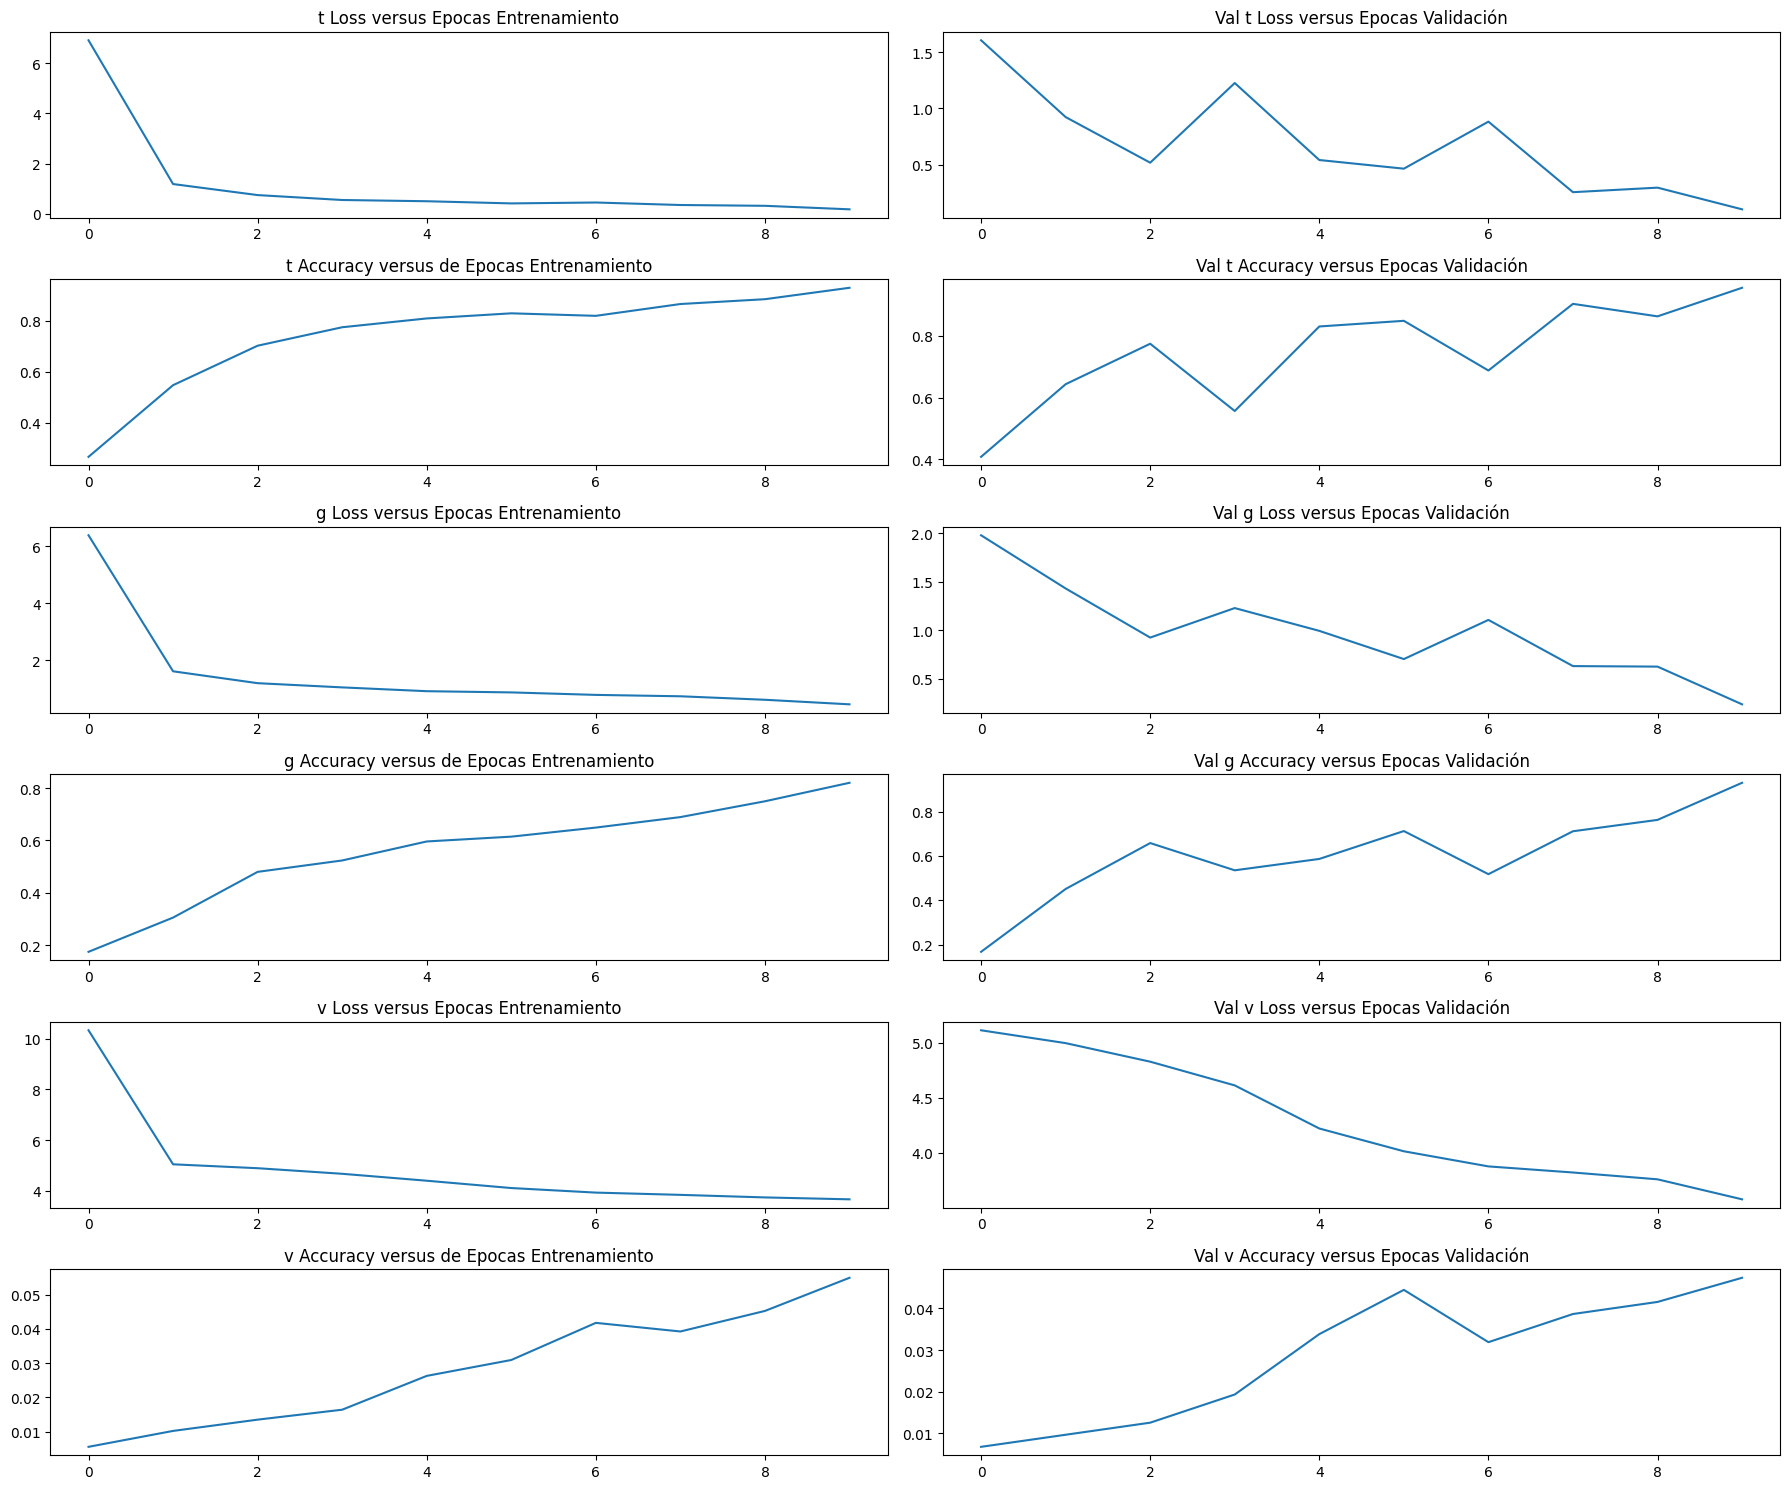

In [19]:
fig, axis = plt.subplots(6, 2, figsize=(18,15))
# trendlines
axis[0,0].plot(history.history['t_out_loss'], label='train t_out_loss')
axis[0,1].plot(history.history['val_t_out_loss'], label='val  t_out_loss')
axis[1,0].plot(history.history['t_out_accuracy'], label='train t_out_accuracy')
axis[1,1].plot(history.history['val_t_out_accuracy'], label='val t_out_accuracy')
axis[2,0].plot(history.history['g_out_loss'], label='train g_out_loss')
axis[2,1].plot(history.history['val_g_out_loss'], label='val  g_out_loss')
axis[3,0].plot(history.history['g_out_accuracy'], label='train g_out_accuracy')
axis[3,1].plot(history.history['val_g_out_accuracy'], label='val g_out_accuracy')
axis[4,0].plot(history.history['v_out_loss'], label='train v_out_loss')
axis[4,1].plot(history.history['val_v_out_loss'], label='val  v_out_loss')
axis[5,0].plot(history.history['v_out_accuracy'], label='train v_out_accuracy')
axis[5,1].plot(history.history['val_v_out_accuracy'], label='val v_out_accuracy')

# titles
axis[0,0].set_title("t Loss versus Epocas Entrenamiento")
axis[0,1].set_title("Val t Loss versus Epocas Validación")
axis[1,0].set_title("t Accuracy versus de Epocas Entrenamiento")
axis[1,1].set_title("Val t Accuracy versus Epocas Validación")
axis[2,0].set_title("g Loss versus Epocas Entrenamiento")
axis[2,1].set_title("Val g Loss versus Epocas Validación")
axis[3,0].set_title("g Accuracy versus de Epocas Entrenamiento")
axis[3,1].set_title("Val g Accuracy versus Epocas Validación")
axis[4,0].set_title("v Loss versus Epocas Entrenamiento")
axis[4,1].set_title("Val v Loss versus Epocas Validación")
axis[5,0].set_title("v Accuracy versus de Epocas Entrenamiento")
axis[5,1].set_title("Val v Accuracy versus Epocas Validación")
plt.tight_layout()
plt.show()

# CNN, entrenamiento v diferenciado

In [45]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

#input_shape = (4, 10, 128) = (batch_size, steps, vectorLength) = (batchsize, rotaciones, frecuencias)

normalize = layers.Normalization()

normalize.adapt(x_train)

input_shape = (x_train.shape[1],1)

simple_model = tf.keras.Sequential([
  keras.Input(shape=(input_shape)),
  normalize,
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.MaxPooling1D(pool_size=3, padding='same'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling1D(),
])

In [46]:
simple_model = tf.keras.Model(inputs=simple_model.input, outputs=simple_model.output)

In [47]:
hidden_v = layers.Dense(128, activation='relu')(simple_model.output)
output_v = layers.Dense(NUM_CLASSES_v, activation='softmax',name='v_out')(hidden_v)
# la linea de abajo es la que ensambla
complete_model = tf.keras.Model(inputs=simple_model.input, outputs=output_v)  
complete_model.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 702, 1)]          0         
                                                                 
 normalization_7 (Normalizat  (None, 702, 702)         1405      
 ion)                                                            
                                                                 
 conv1d_64 (Conv1D)          (None, 702, 32)           67424     
                                                                 
 conv1d_65 (Conv1D)          (None, 702, 32)           3104      
                                                                 
 conv1d_66 (Conv1D)          (None, 702, 32)           3104      
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 234, 32)          0         
 g1D)                                                     

In [48]:
complete_model.compile(loss = ['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['accuracy'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = complete_model.fit(x=x_train, y=y_train_v,validation_data=(x_val,y_val_v), epochs=30)

Epoch 1/30
162/162 [==============================] - 5s 29ms/step - loss: 13.0214 - accuracy: 0.0077 - val_loss: 5.1693 - val_accuracy: 0.0126
Epoch 2/30
162/162 [==============================] - 4s 27ms/step - loss: 4.8844 - accuracy: 0.0135 - val_loss: 4.7281 - val_accuracy: 0.0193
Epoch 3/30
162/162 [==============================] - 4s 27ms/step - loss: 4.5650 - accuracy: 0.0201 - val_loss: 4.3402 - val_accuracy: 0.0319
Epoch 4/30
162/162 [==============================] - 4s 27ms/step - loss: 4.1515 - accuracy: 0.0365 - val_loss: 4.1676 - val_accuracy: 0.0348
Epoch 5/30
162/162 [==============================] - 4s 27ms/step - loss: 3.8110 - accuracy: 0.0531 - val_loss: 3.6850 - val_accuracy: 0.0483
Epoch 6/30
162/162 [==============================] - 4s 27ms/step - loss: 3.5843 - accuracy: 0.0746 - val_loss: 3.5021 - val_accuracy: 0.0628
Epoch 7/30
162/162 [==============================] - 4s 27ms/step - loss: 3.5921 - accuracy: 0.0717 - val_loss: 3.4168 - val_accuracy: 0.093

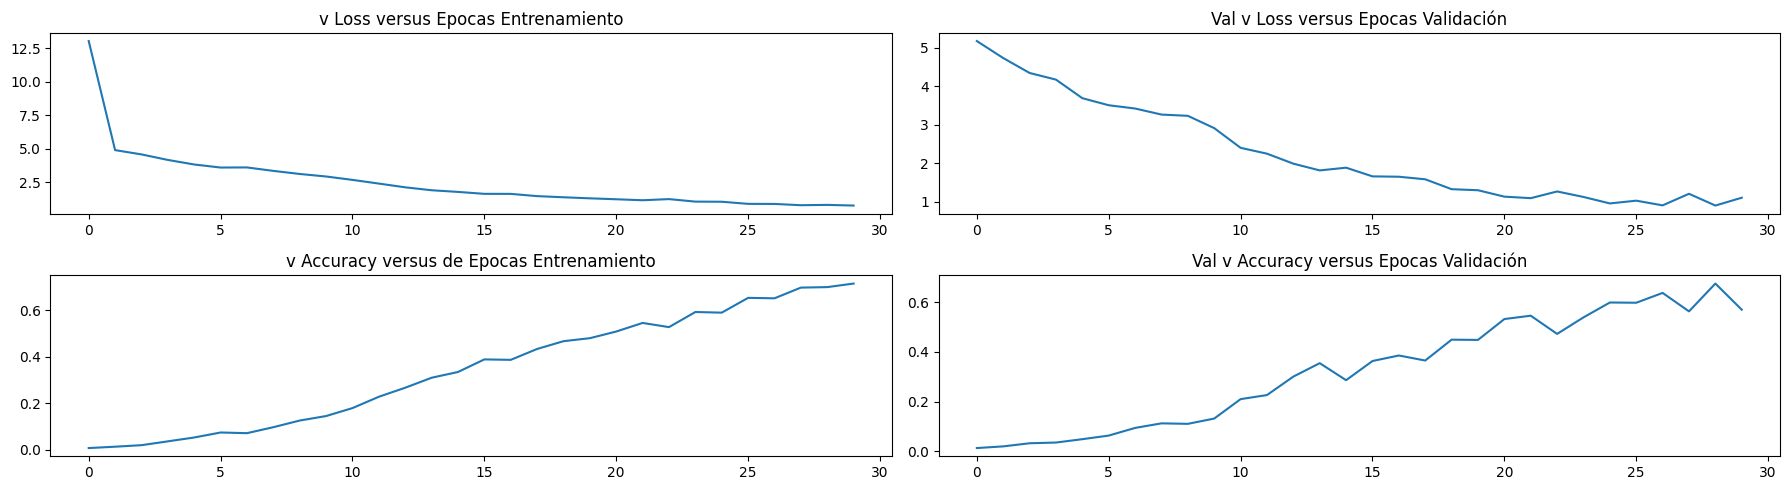

In [49]:
fig, axis = plt.subplots(2, 2, figsize=(18,5))
# trendlines
axis[0,0].plot(history.history['loss'], label='train t_out_loss')
axis[0,1].plot(history.history['val_loss'], label='val  t_out_loss')
axis[1,0].plot(history.history['accuracy'], label='train t_out_accuracy')
axis[1,1].plot(history.history['val_accuracy'], label='val t_out_accuracy')


# titles
axis[0,0].set_title("v Loss versus Epocas Entrenamiento")
axis[0,1].set_title("Val v Loss versus Epocas Validación")
axis[1,0].set_title("v Accuracy versus de Epocas Entrenamiento")
axis[1,1].set_title("Val v Accuracy versus Epocas Validación")

plt.tight_layout()
plt.show()